In [2]:
# import Lib
import cv2
import numpy as np
import math
import matplotlib.image as mping

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
img_1 = mping.imread("girl.jpg")
img_2 = mping.imread("sleep_girl.jpg")

Text(0.5, 1.0, 'Cb')

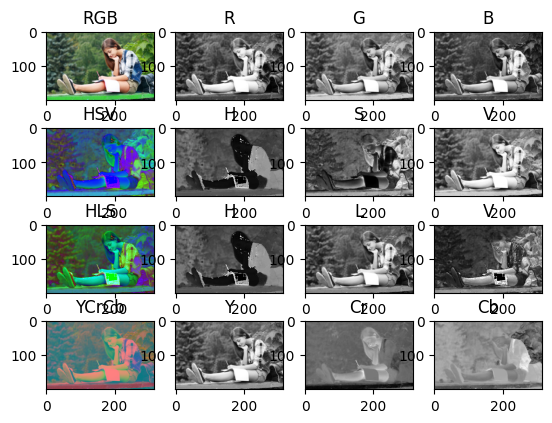

In [4]:
HSV = cv2.cvtColor(img_1, cv2.COLOR_RGB2HSV)
HLS = cv2.cvtColor(img_1, cv2.COLOR_RGB2HLS)
YCrCb = cv2.cvtColor(img_1, cv2.COLOR_RGB2YCrCb)

yR = img_1[:,:,0]
yG = img_1[:,:,1]
yB = img_1[:,:,2]

xH = HSV[:,:,0]
xS = HSV[:,:,1]
xV = HSV[:,:,2]

iH = HLS[:,:,0]
iL = HLS[:,:,1]
iS = HLS[:,:,2]

sY = YCrCb[:,:,0]
sCr = YCrCb[:,:,1]
sCb = YCrCb[:,:,2]

# Config Show Picture
# Line 1
plt.subplot(4,4,1);plt.imshow(img_1);plt.title("RGB")
plt.subplot(4,4,2);plt.imshow(yR, cmap='gray');plt.title("R")
plt.subplot(4,4,3);plt.imshow(yG, cmap='gray');plt.title("G")
plt.subplot(4,4,4);plt.imshow(yB, cmap='gray');plt.title("B")

# Line 2
plt.subplot(4,4,5);plt.imshow(HSV);plt.title("HSV")
plt.subplot(4,4,6);plt.imshow(xH, cmap='gray');plt.title("H")
plt.subplot(4,4,7);plt.imshow(xS, cmap='gray');plt.title("S")
plt.subplot(4,4,8);plt.imshow(xV, cmap='gray');plt.title("V")

# Line 3
plt.subplot(4,4,9);plt.imshow(HLS);plt.title("HLS")
plt.subplot(4,4,10);plt.imshow(iH, cmap='gray');plt.title("H")
plt.subplot(4,4,11);plt.imshow(iL, cmap='gray');plt.title("L")
plt.subplot(4,4,12);plt.imshow(iS, cmap='gray');plt.title("V")

# Line 4
plt.subplot(4,4,13);plt.imshow(YCrCb);plt.title("YCrCb")
plt.subplot(4,4,14);plt.imshow(sY, cmap='gray');plt.title("Y")
plt.subplot(4,4,15);plt.imshow(sCr, cmap='gray');plt.title("Cr")
plt.subplot(4,4,16);plt.imshow(sCb, cmap='gray');plt.title("Cb")

In [20]:
# resize picture
R_img_1 = cv2.resize(img_1, (316, 200))
R_img_2 = cv2.resize(img_2, (316, 200))
img_1_resize = cv2.cvtColor(R_img_1, cv2.COLOR_BGR2RGB)
img_2_resize = cv2.cvtColor(R_img_2, cv2.COLOR_BGR2RGB)

output_file = "1_2_2.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

fps = 1
frame = 60

out = cv2.VideoWriter(output_file, fourcc, fps, (img_1_resize.shape[1], img_1_resize.shape[0]))

w = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0]

for w1, w2 in zip(w, w[::-1]):
    image_result = cv2.addWeighted(img_1_resize, w1, img_2_resize, w2, 0)
    out.write(image_result)
    
for w2, w1 in zip(w, w[::-1]):
    image_result = cv2.addWeighted(img_1_resize, w1, img_2_resize, w2, 0)
    out.write(image_result)

out.release()

Text(0.5, 1.0, 'Bitwise_AND() result')

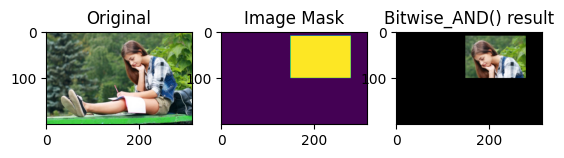

In [39]:
R_img = cv2.resize(img_1, (316, 200))

plt.subplot(1, 3, 1);plt.imshow(R_img);plt.title('Original')

h, w = R_img.shape[:2]

mask = np.zeros((h, w), dtype=np.uint8)

cv2.rectangle(mask, (280, 10), (150, 100), 255, -1)
plt.subplot(1, 3, 2);plt.imshow(mask);plt.title('Image Mask')

masked_image = cv2.bitwise_and(R_img, R_img, mask=mask)
plt.subplot(1, 3, 3);plt.imshow(masked_image);plt.title('Bitwise_AND() result')